In [1]:
# load package
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

In [2]:
import csv

In [3]:

lb_adaptive = "../oct/for_sp_hypB/for_3/adaptive.csv"
lb_retrain = "../oct/for_sp_hypB/for_3/NN_retraining.csv"
lb_robin = "../oct/for_sp_hypB/for_3/randArobin.csv"
new_con = "../oct/for_sp_hypB/for_3/disruptions.csv"

In [4]:
x = []
adaptive = [] 
with open(lb_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            adaptive.append(float(row[row_list[1]]))
        line_count += 1    
        
maxVal = max(adaptive)
adaptive = [y/maxVal for y in adaptive]    
            

In [ ]:
print(x)

In [ ]:
print(adaptive)

In [5]:
retraining = []
with open(lb_retrain, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            retraining.append(float(row[row_list[1]]))
        line_count += 1  
        
retraining = [y/maxVal for y in retraining]   

In [ ]:
print(retraining)

In [6]:
roundRobin = []
with open(lb_robin, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            roundRobin.append(float(row[row_list[2]]))
        line_count += 1  
        
roundRobin = [y/maxVal for y in roundRobin] 

In [ ]:
print(roundRobin)

In [7]:
newCons = [] 
with open(new_con, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            register = float(row[row_list[1]])
            if register > 0:
                register = 1
            newCons.append(register)
        line_count += 1    
        
maxVal = max(newCons)
newCons = [y/maxVal for y in newCons]    

In [ ]:
print(newCons)

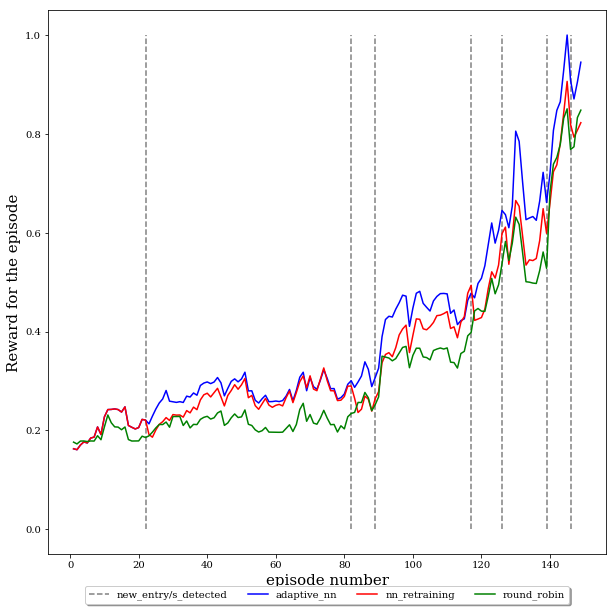

In [8]:
fig = plt.figure(figsize=(10,10))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

entry_ct = 0
for entry in range(len(newCons)):
    if newCons[entry] == 1:
        if entry_ct == 0:  
            ax.plot([entry,entry],[0,1], color='0.50', ls='dashed', label = "new_entry/s_detected")
        else:
            ax.plot([entry,entry],[0,1], color='0.50', ls='dashed')
        entry_ct += 1
        
        
ax.plot(x, adaptive, color='b', ls='solid', label = "adaptive_nn")
ax.plot(x, retraining, color='r', ls='solid', label = "nn_retraining")
ax.plot(x, roundRobin, color='g', ls='solid', label = "round_robin")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()


In [9]:
def moving_avg(x,window_size=1):
    i = 0
    mv_x = []
    while i < len(x)-window_size+1 :
        this_window = x[i:i+window_size]
        window_avg = sum(this_window) / window_size
        mv_x.append(window_avg)
        i += 1
        
    return mv_x

In [10]:
window_size=5
mvavg_adaptive = moving_avg(adaptive,window_size)
mvavg_retraining = moving_avg(retraining,window_size)
mvavg_roundRobin = moving_avg(roundRobin,window_size)
x_mvavg = x[window_size-1:]


c:\Users\AkritPC\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['seri0f'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


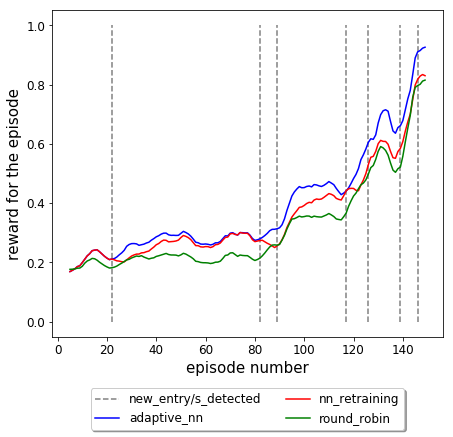

In [11]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='seri0f')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('reward for the episode', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

entry_ct = 0
for entry in range(len(newCons)):
    if newCons[entry] == 1:
        if entry_ct == 0:  
            ax.plot([entry,entry],[0,1], color='0.50', ls='dashed', label = "new_entry/s_detected")
        else:
            ax.plot([entry,entry],[0,1], color='0.50', ls='dashed')
        entry_ct += 1
        
        
ax.plot(x_mvavg, mvavg_adaptive, color='b', ls='solid', label = "adaptive_nn")
ax.plot(x_mvavg, mvavg_retraining, color='r', ls='solid', label = "nn_retraining")
ax.plot(x_mvavg, mvavg_roundRobin, color='g', ls='solid', label = "round_robin")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14),
          fancybox=True, shadow=True, ncol=2, prop=dict(size=12))

#plt.xlim(0,100)
plt.show()


In [38]:
ratio_adaptive = "../oct/for_sp_hypB/for_3/ratio_adaptive.csv"
ratio_retrain = "../oct/for_sp_hypB/for_3/ratio_NN_retraining.csv"

In [39]:
x = []
total = []
adaptive = [] 
rand = []
robin = []
retrain = []

with open(ratio_adaptive, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            x.append(float(row[row_list[0]]))
            total.append(float(row[row_list[1]]))
            adaptive.append(float(row[row_list[2]]))
            rand.append(float(row[row_list[3]]))
            robin.append(float(row[row_list[4]]))
        line_count += 1  
        
with open(ratio_retrain, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            retrain.append(float(row[row_list[2]]))
        line_count += 1  
  
        

In [40]:
adaptiveR = []
retrainR = []
randR = []
robinR = []

for i in range(len(x)):
    adaptiveR.append(100 * adaptive[i] / total[i])
    retrainR.append(100 * retrain[i] / total[i])
    randR.append(100 * rand[i] / total[i])
    robinR.append(100 * robin[i] / total[i])
    

IndexError: list index out of range

In [33]:
newCons = [] 
with open(new_con, mode='r', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            row_list = list(row)
            register = float(row[row_list[1]])
            if register > 0:
                register = 1
            newCons.append(register)
        line_count += 1    
        
maxVal = max(newCons)
newCons = [y/maxVal for y in newCons] 

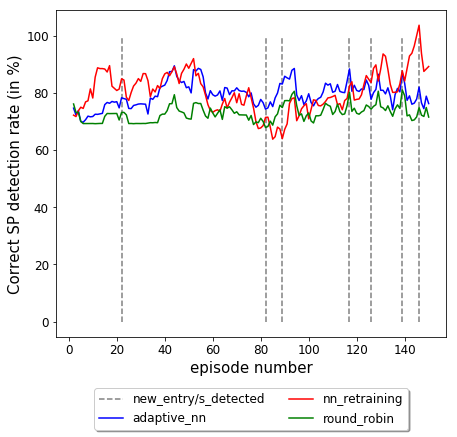

In [34]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='seri0f')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Correct SP detection rate (in %)', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
entry_ct = 0
for entry in range(len(newCons)):
    if newCons[entry] == 1:
        if entry_ct == 0:  
            ax.plot([entry,entry],[0,100], color='0.50', ls='dashed', label = "new_entry/s_detected")
        else:
            ax.plot([entry,entry],[0,100], color='0.50', ls='dashed')
        entry_ct += 1
        
        
ax.plot(x, adaptiveR, color='b', ls='solid', label = "adaptive_nn")
ax.plot(x, retrainR, color='r', ls='solid', label = "nn_retraining")
ax.plot(x, robinR, color='g', ls='solid', label = "round_robin")
#ax.plot(x, randR, color='k', ls='solid', label = "random")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14),
          fancybox=True, shadow=True, ncol=2, prop=dict(size=12))

#plt.xlim(0,100)
plt.show()

In [35]:
window_size=5
mvavg_adaptiveR = moving_avg(adaptiveR,window_size)
mvavg_retrainR = moving_avg(retrainR,window_size)
mvavg_robinR = moving_avg(robinR,window_size)
mvavg_randR = moving_avg(randR,window_size)
x_mvavg = x[window_size-1:]


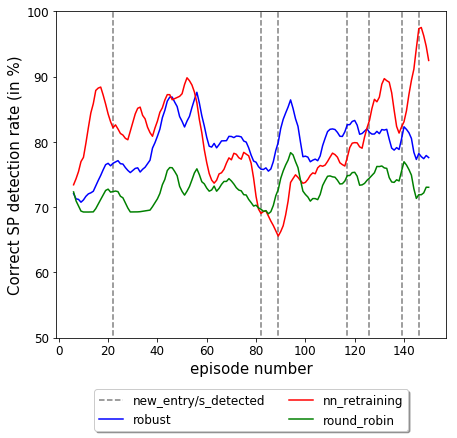

In [36]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='seri0f')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('episode number', size=15)
ax.set_ylabel('Correct SP detection rate (in %)', size=15)

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylim([50,100])

entry_ct = 0
for entry in range(len(newCons)):
    if newCons[entry] == 1:
        if entry_ct == 0:  
            ax.plot([entry,entry],[0,100], color='0.50', ls='dashed', label = "new_entry/s_detected")
        else:
            ax.plot([entry,entry],[0,100], color='0.50', ls='dashed')
        entry_ct += 1
        
        
ax.plot(x_mvavg, mvavg_adaptiveR, color='b', ls='solid', label = "robust")
ax.plot(x_mvavg, mvavg_retrainR, color='r', ls='solid', label = "nn_retraining")
ax.plot(x_mvavg, mvavg_robinR, color='g', ls='solid', label = "round_robin")
#ax.plot(x_mvavg, mvavg_randR, color='k', ls='solid', label = "random")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.14),
          fancybox=True, shadow=True, ncol=2, prop=dict(size=12))

#plt.xlim(0,100)
plt.show()

In [37]:
avg_adapt = sum(adaptiveR) / len(adaptiveR)
avg_retrain = sum(retrainR) / len(retrainR)
avg_robin = sum(randR) / len(randR)
avg_rand = sum(robinR) / len(robinR)

print("avg_adapt : ",avg_adapt)
print("avg_retrain : ",avg_retrain)
print("avg_robin : ",avg_robin)
print("avg_rand : ",avg_rand)

avg_adapt :  79.39830030124219
avg_retrain :  80.54112690370252
avg_robin :  71.51764285879588
avg_rand :  72.85437490961915


In [ ]:
robin_better = 100* (avg_adapt-avg_robin) / avg_robin  
retrain_better = 100* (avg_adapt-avg_retrain) / avg_retrain

print(" better by than robin: ", robin_better)
print(" better by than retrain: ", retrain_better)

In [41]:
buj = [1,2,3,4]
total = 7
location = "../oct/for_sp_hypB/for_"

In [42]:
lb_adaptive = []
lb_retrain= []
lb_robin= []
new_con= []

In [ ]:
for budget in buj:
    lb_adaptive.append(location + str(budget) +  "/adaptive.csv") 
    lb_retrain.append(location + str(budget) +"/NN_retraining.csv") 
    lb_robin.append(location + str(budget) +"/randArobin.csv") 
    new_con.append(location + str(budget) +"/disruptions.csv") 

In [ ]:
print(lb_adaptive)
print(lb_retrain)

In [ ]:
sum_adaptive = []
for entry in lb_adaptive:
    x = []
    adaptive = [] 
    with open(entry, mode='r', newline='') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count != 0:
                row_list = list(row)
                x.append(float(row[row_list[0]]))
                adaptive.append(float(row[row_list[1]]))
            line_count += 1  
    sum_adaptive.append(sum(adaptive))  
        

In [ ]:
print(sum_adaptive)

In [ ]:
sum_retrain = []
for entry in lb_retrain:
    x = []
    retrain = [] 
    with open(entry, mode='r', newline='') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count != 0:
                row_list = list(row)
                x.append(float(row[row_list[0]]))
                retrain.append(float(row[row_list[1]]))
            line_count += 1  
    sum_retrain.append(sum(retrain))  

In [ ]:
sum_retrain

In [ ]:
sum_robin = []
for entry in lb_robin:
    x = []
    robin = [] 
    with open(entry, mode='r', newline='') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count != 0:
                row_list = list(row)
                x.append(float(row[row_list[0]]))
                robin.append(float(row[row_list[1]]))
            line_count += 1  
    sum_robin.append(sum(robin))  

In [ ]:
sum_robin


In [ ]:
normalized_adaptive = [100*x/y for x,y in zip(sum_adaptive,sum_robin)]
normalized_retrain = [100*x/y for x,y in zip(sum_retrain,sum_robin)]

In [ ]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('budget', size=15)
ax.set_ylabel('percent improvement over rand_robin', size=15)
plt.ylim([100,150])

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
budget = [100 * float(x) / total for x in buj]
             
ax.plot(budget, normalized_adaptive, color='b', ls='solid', label = "robust")
plt.scatter(budget, normalized_adaptive, color='b')
ax.plot(budget, normalized_retrain, color='r', ls='solid', label = "nn_retraining")
plt.scatter(budget, normalized_retrain, color='r')


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2, prop=dict(size=12))

plt.show()

In [3]:
buj = [1,2,3,4]
total_buj = 7
location = "../twoOct/for_sp_hypB/for_"

In [4]:
lb_adaptive_ratio = []
lb_retrain_ratio = []
lb_robin_ratio = []
new_con= []

In [5]:
for budget in buj:
    lb_adaptive_ratio.append(location + str(budget) +  "/ratio_adaptive.csv") 
    lb_retrain_ratio.append(location + str(budget) +"/ratio_NN_retraining.csv") 
    #lb_robin_ratio.append(location + str(budget) +"/randArobin.csv") 
    new_con.append(location + str(budget) +"/disruptions.csv") 

In [6]:
print(lb_adaptive_ratio)
print(lb_retrain_ratio)

['../twoOct/for_sp_hypB/for_1/ratio_adaptive.csv', '../twoOct/for_sp_hypB/for_2/ratio_adaptive.csv', '../twoOct/for_sp_hypB/for_3/ratio_adaptive.csv', '../twoOct/for_sp_hypB/for_4/ratio_adaptive.csv']
['../twoOct/for_sp_hypB/for_1/ratio_NN_retraining.csv', '../twoOct/for_sp_hypB/for_2/ratio_NN_retraining.csv', '../twoOct/for_sp_hypB/for_3/ratio_NN_retraining.csv', '../twoOct/for_sp_hypB/for_4/ratio_NN_retraining.csv']


In [7]:
def Average(lst):
    return sum(lst) / len(lst)

In [26]:
sum_adaptive_ratio = []
sum_robin_ratio = []
for entry in lb_adaptive_ratio:
    x = []
    adaptive = [] 
    robin = []
    total = []
    with open(entry, mode='r', newline='') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count != 0  and line_count < 100:
                row_list = list(row)
                x.append(float(row[row_list[0]]))
                total.append(float(row[row_list[1]]))
                adaptive.append(float(row[row_list[2]]))
                robin.append(float(row[row_list[4]]))
            line_count += 1  
    adaptive_ratio = [100*n/d for n,d in zip(adaptive,total)]
    robin_ratio = [100*n/d for n,d in zip(robin,total)]
    sum_adaptive_ratio.append(Average(adaptive_ratio))  
    sum_robin_ratio.append(Average(robin_ratio))  
    

In [27]:
print(sum_adaptive_ratio)

[71.48026474781116, 74.6061253536034, 80.93080029237909, 86.83280268967427]


In [28]:
print(sum_robin_ratio)

[68.20313279151043, 70.45348715790435, 75.02363547260622, 79.45693366673501]


In [29]:
sum_retrain_ratio = []
sum_robin_ratio = []
for entry in lb_retrain_ratio:
    x = []
    retrain = [] 
    robin = []
    total = []
    with open(entry, mode='r', newline='') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count != 0 and line_count < 100:
                row_list = list(row)
                x.append(float(row[row_list[0]]))
                total.append(float(row[row_list[1]]))
                retrain.append(float(row[row_list[2]]))
                robin.append(float(row[row_list[4]]))
            line_count += 1  
    retrain_ratio = [100*n/d for n,d in zip(retrain,total)]
    robin_ratio = [100*n/d for n,d in zip(robin,total)]
    sum_retrain_ratio.append(Average(retrain_ratio))  
    sum_robin_ratio.append(Average(robin_ratio))  

In [30]:
sum_retrain_ratio

[70.36175310255119, 72.91906480111803, 77.94954864206706, 83.0793380234718]

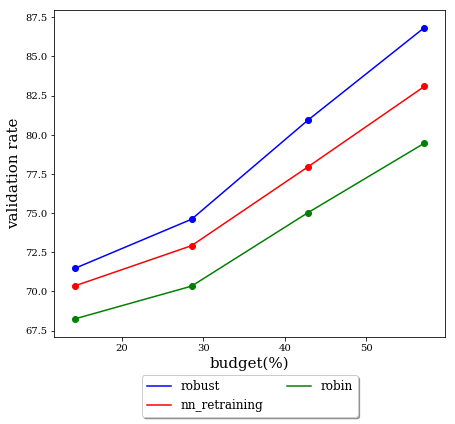

In [35]:
fig = plt.figure(figsize=(7,6))

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('budget(%)', size=15)
ax.set_ylabel('validation rate', size=15)
#plt.ylim([100,150])

#ax.set_xticks([1,10,20,30,40,50,60,70,80,90,100])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
budget = [100 * float(x) / float(total_buj) for x in buj]
             
ax.plot(budget, sum_adaptive_ratio, color='b', ls='solid', label = "robust")
plt.scatter(budget, sum_adaptive_ratio, color='b')
ax.plot(budget, sum_retrain_ratio, color='r', ls='solid', label = "nn_retraining")
plt.scatter(budget, sum_retrain_ratio, color='r')
ax.plot(budget, sum_robin_ratio, color='g', ls='solid', label = "robin")
plt.scatter(budget, sum_robin_ratio, color='g')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2, prop=dict(size=12))

plt.show()